KHIZAR MEHMOOD
01-134212-074

FILTER APPLICATION FUNCTION

In [5]:
import cv2
import numpy as np

def apply_convolution(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    output = np.zeros_like(image)
    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            output[i, j] = np.sum(region * kernel)

    return output

TASK: 1

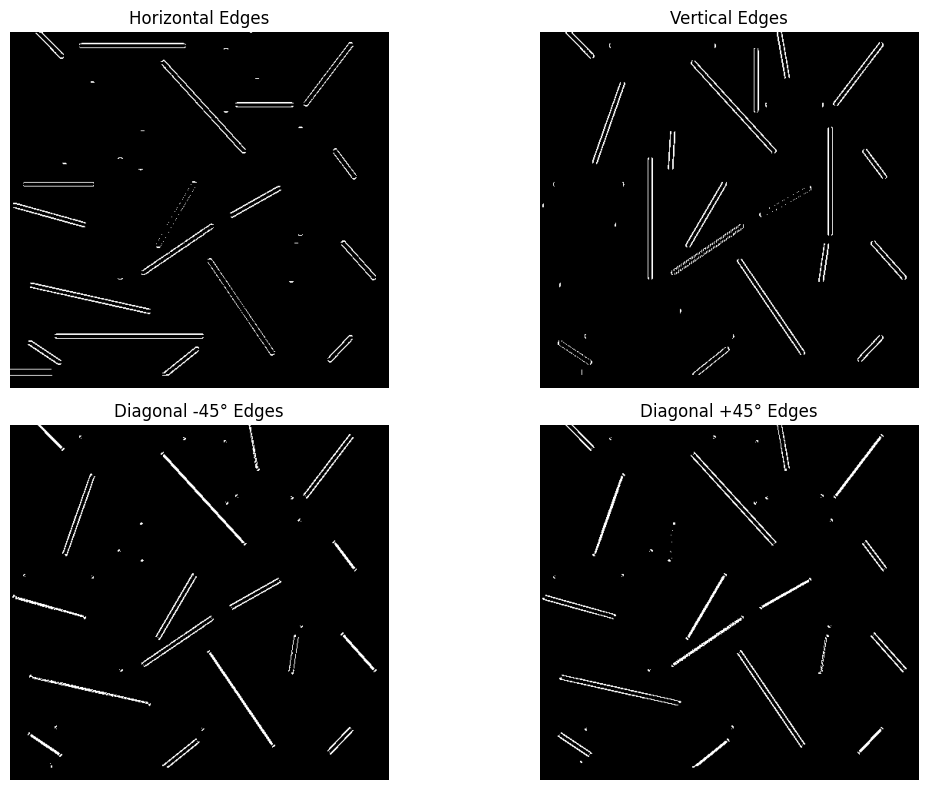

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Picture1.png', cv2.IMREAD_GRAYSCALE)

horizontal_filter = np.array([[ -1, -1, -1],
                               [  2,  2,  2],
                               [ -1, -1, -1]])

vertical_filter = np.array([[ -1,  2, -1],
                             [ -1,  2, -1],
                             [ -1,  2, -1]])

diagonal_neg_filter = np.array([[ -1, -1,  2],
                                 [ -1,  2, -1],
                                 [  2, -1, -1]])

diagonal_pos_filter = np.array([[  2, -1, -1],
                                 [ -1,  2, -1],
                                 [ -1, -1,  2]])

def apply_filter(image, filter):
    return cv2.filter2D(image, -1, filter)

horizontal_edges = apply_filter(image, horizontal_filter)
vertical_edges = apply_filter(image, vertical_filter)
diagonal_neg_edges = apply_filter(image, diagonal_neg_filter)
diagonal_pos_edges = apply_filter(image, diagonal_pos_filter)

_, horizontal_edges = cv2.threshold(horizontal_edges, 50, 255, cv2.THRESH_BINARY)
_, vertical_edges = cv2.threshold(vertical_edges, 50, 255, cv2.THRESH_BINARY)
_, diagonal_neg_edges = cv2.threshold(diagonal_neg_edges, 50, 255, cv2.THRESH_BINARY)
_, diagonal_pos_edges = cv2.threshold(diagonal_pos_edges, 50, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title('Horizontal Edges')
plt.imshow(horizontal_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Vertical Edges')
plt.imshow(vertical_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Diagonal -45° Edges')
plt.imshow(diagonal_neg_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Diagonal +45° Edges')
plt.imshow(diagonal_pos_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

TASK: 2

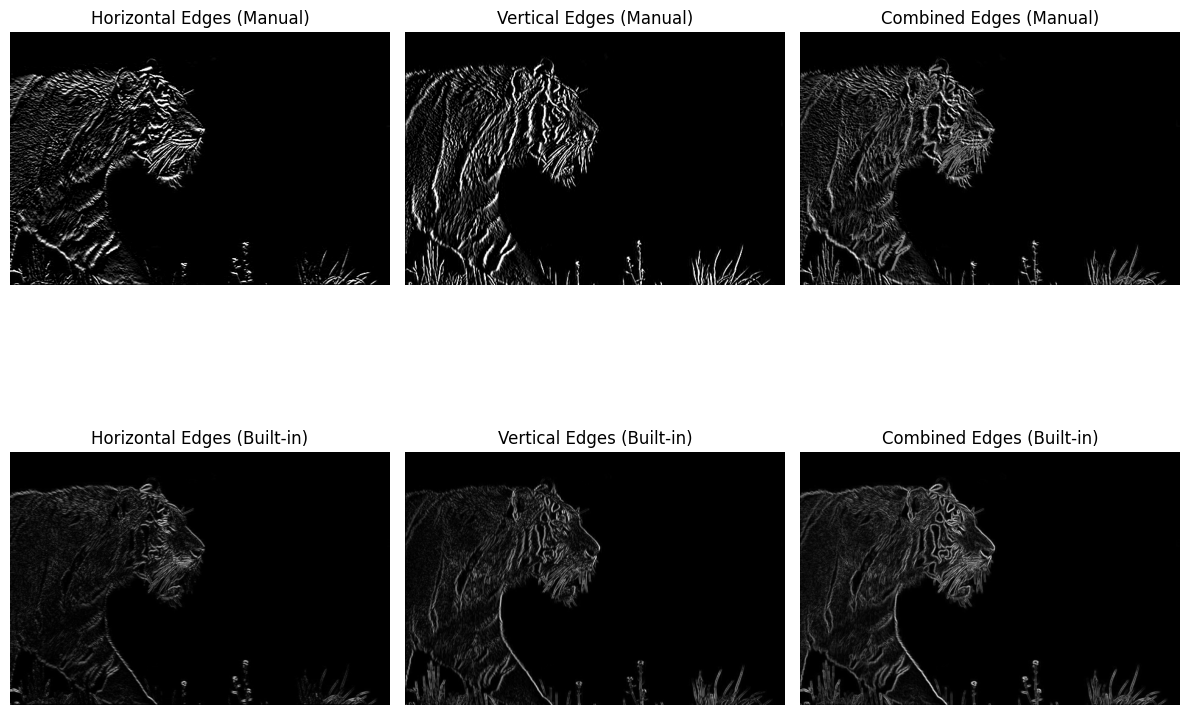

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Picture2.jpg', 0)

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

def apply_sobel_filter(image, kernel):
    return cv2.filter2D(image, -1, kernel)

horizontal_edges_manual = apply_sobel_filter(image, sobel_y)
vertical_edges_manual = apply_sobel_filter(image, sobel_x)

horizontal_edges_builtin = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
vertical_edges_builtin = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)

combined_edges_manual = cv2.addWeighted(np.abs(horizontal_edges_manual), 0.5, np.abs(vertical_edges_manual), 0.5, 0)
combined_edges_builtin = cv2.addWeighted(np.abs(horizontal_edges_builtin), 0.5, np.abs(vertical_edges_builtin), 0.5, 0)

plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.title('Horizontal Edges (Manual)')
plt.imshow(np.abs(horizontal_edges_manual), cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Vertical Edges (Manual)')
plt.imshow(np.abs(vertical_edges_manual), cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Combined Edges (Manual)')
plt.imshow(combined_edges_manual, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Horizontal Edges (Built-in)')
plt.imshow(np.abs(horizontal_edges_builtin), cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Vertical Edges (Built-in)')
plt.imshow(np.abs(vertical_edges_builtin), cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Combined Edges (Built-in)')
plt.imshow(combined_edges_builtin, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

TASK: 3

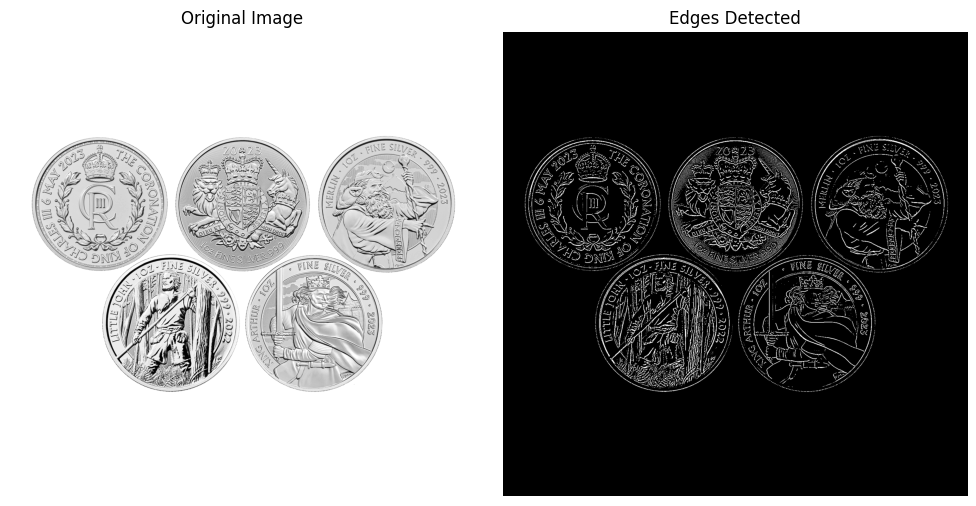

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Picture3.png', 0)

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

laplacian_kernel = np.array([[0, 1, 0],
                              [1, -4, 1],
                              [0, 1, 0]])

edges = cv2.filter2D(blurred_image, -1, laplacian_kernel)

edges_normalized = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX)

_, binary_edges = cv2.threshold(edges_normalized, 50, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Edges Detected')
plt.imshow(binary_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()